# LASI 2021 Machine Learning Workshop

##  Grammar of Data Manipulation, based on R's dplyr
##  Pandas dataframe
Instructors: Alfred Essa, Lalitha Agnihotri

Our approach in this section will be to use, ironically enough, R as a starting point. If you are familiar with R, dplyr is a ``grammar`` of data manipulation, providing a consistent set of verbs that help you solve the most common data manipulation challenges. The dplyr transformations on a dataframe are:

- **mutate** adds new variables that are functions of existing variables
- **select** picks variables based on their names.
- **filter** picks cases based on their values.
- **summarise** reduces multiple values down to a single summary.
- **arrange** changes the ordering of the rows.

Our starting point is a dataframe and operations on the dataframe. 

We need to note that a Python dataframe is similar but not the same as an R dataframe. It is the same in the sense that a dataframe has a tabular structure, containing rows and columns. It is not the same in the sense that in Python rows and columns can have labels.

In [1]:
# import libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

### 2.21 Load Data

In [2]:
# we are loading a csv file and creating a dataframe
df = pd.read_csv("data/StudentsPerformance.csv")

In [3]:
# examining the first five records
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
### Basic Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.shape

(1000, 8)

### Select - Subset of Columns

In [6]:
# select a single column
male = df[df['gender']=='male']
female = df[df['gender']=='female']

In [7]:
print(male.shape)
print(female.shape)

(482, 8)
(518, 8)


In [8]:
# created new dataframe with selected columns
scores = df[['gender','math score','reading score','writing score']]

In [9]:
scores.head()

,gender,math score,reading score,writing score
0,female,72,72,74
1,female,69,90,88
2,female,90,95,93
3,male,47,57,44
4,male,76,78,75


### Filter  - subset using some condition

In [10]:
# females whose score in math was greater than 70
new_df = df[(df['gender']=='female') & (df["math score"]>=70)]

In [11]:
df.iloc[0:5,2:5]

,parental level of education,lunch,test preparation course
0,bachelor's degree,standard,none
1,some college,standard,completed
2,master's degree,standard,none
3,associate's degree,free/reduced,none
4,some college,standard,none


In [12]:
new_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
36,female,group D,associate's degree,standard,none,74,81,83


In [13]:
new_df = df[(df['gender']=='female') & (df["math score"]>=70)][["math score","reading score", "writing score"]]

### Arrange - sort by some column

In [14]:
# ten lowest math scores
df.sort_values(by="math score").head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10
980,female,group B,high school,free/reduced,none,8,24,23
17,female,group B,some high school,free/reduced,none,18,32,28
787,female,group B,some college,standard,none,19,38,32
145,female,group C,some college,free/reduced,none,22,39,33
842,female,group B,high school,free/reduced,completed,23,44,36
338,female,group B,some high school,free/reduced,none,24,38,27
466,female,group D,associate's degree,free/reduced,none,26,31,38
91,male,group C,high school,free/reduced,none,27,34,36
363,female,group D,some high school,free/reduced,none,27,34,32


In [15]:
# ten heaviest math scores
df.sort_values(by="math score", ascending=False).head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
962,female,group E,associate's degree,standard,none,100,100,100
625,male,group D,some college,standard,completed,100,97,99
458,female,group E,bachelor's degree,standard,none,100,100,100
623,male,group A,some college,standard,completed,100,96,86
451,female,group E,some college,standard,none,100,92,97
149,male,group E,associate's degree,free/reduced,completed,100,100,93
916,male,group E,bachelor's degree,standard,completed,100,100,100
263,female,group E,high school,standard,none,99,93,90
306,male,group E,some college,standard,completed,99,87,81
114,female,group E,bachelor's degree,standard,completed,99,100,100


### 2.25 Mutate - add column

In [16]:
# create a new column weight/mpg
df['average score'] = (df['math score']+ df['reading score'] + df['writing score'])/3

In [17]:
df['average score'] = df['average score'].apply(int)

In [18]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72
1,female,group C,some college,standard,completed,69,90,88,82
2,female,group B,master's degree,standard,none,90,95,93,92
3,male,group A,associate's degree,free/reduced,none,47,57,44,49
4,male,group C,some college,standard,none,76,78,75,76


### 2.26 Summarise

In [19]:
df.mean()

math score       66.089
reading score    69.169
writing score    68.054
average score    67.445
dtype: float64

In [20]:
df.std()

math score       15.163080
reading score    14.600192
writing score    15.195657
average score    14.263324
dtype: float64

In [21]:
# group dataframe by origin
grp_gender = df.groupby('gender')

In [22]:
grp_gender.mean()

,math score,reading score,writing score,average score
gender,,,,
female,63.633205,72.608108,72.467181,69.239382
male,68.728216,65.473029,63.311203,65.516598


### 2.26 More on iloc and loc

In [26]:
#iloc goes by row number
#loc goes by index

In [27]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72
1,female,group C,some college,standard,completed,69,90,88,82
2,female,group B,master's degree,standard,none,90,95,93,92
3,male,group A,associate's degree,free/reduced,none,47,57,44,49
4,male,group C,some college,standard,none,76,78,75,76


In [28]:
df.iloc[2]

gender                                  female
race/ethnicity                         group B
parental level of education    master's degree
lunch                                 standard
test preparation course                   none
math score                                  90
reading score                               95
writing score                               93
average score                               92
Name: 2, dtype: object

In [29]:
df.loc[2]

gender                                  female
race/ethnicity                         group B
parental level of education    master's degree
lunch                                 standard
test preparation course                   none
math score                                  90
reading score                               95
writing score                               93
average score                               92
Name: 2, dtype: object

In [24]:
df.set_index('math score', inplace=True)
print(df.iloc[8])
print("")
print(df.loc[8])

gender                                 male
race/ethnicity                      group D
parental level of education     high school
lunch                          free/reduced
test preparation course           completed
reading score                            64
writing score                            67
average score                            65
Name: 64, dtype: object

gender                               female
race/ethnicity                      group B
parental level of education     high school
lunch                          free/reduced
test preparation course                none
reading score                            24
writing score                            23
average score                            18
Name: 8, dtype: object


In [38]:
df[8:9]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,average score
math score,,,,,,,,
64,male,group D,high school,free/reduced,completed,64,67,65


### Pivot Table

In [40]:
#Create a spreadsheet-style pivot table as a DataFrame.
df = df.reset_index()

In [45]:

sample = pd.pivot_table(df,index=["race/ethnicity"],columns=['parental level of education']
                             , values="reading score")
sample

parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
race/ethnicity,,,,,,
group A,67.071429,68.083333,62.888889,64.666667,65.777778,62.083333
group B,69.585366,72.950000,63.458333,80.166667,65.756757,66.447368
group C,71.128205,75.675000,64.421875,70.526316,69.420290,65.632653
group D,70.540000,70.142857,64.409091,77.173913,70.880597,69.980000
group E,73.820513,74.833333,70.318182,82.125000,72.628571,69.555556


In [47]:
import numpy as np
sample = pd.pivot_table(df,index=["race/ethnicity"],columns=['parental level of education']
                             , values="reading score",aggfunc=[np.std,len])
sample

std                                \
parental level of education associate's degree bachelor's degree high school   
race/ethnicity                                                                 
group A                              14.756820         13.124982   14.037299   
group B                              14.319524         13.012039   16.352446   
group C                              12.781235         13.125406   12.919537   
group D                              13.215961         15.775542   13.607997   
group E                              15.993209         16.198221   13.296567   

                                                                           \
parental level of education master's degree some college some high school   
race/ethnicity                                                              
group A                           10.692677    17.764987        17.609080   
group B                           17.081179    14.638999        14.432878   
group C                           12.010960    15.003339        14.789768   
group D                           12.932173    12.614953        14.530039   
group E                           15.468286    11.287905        18.347054   

                                           len                                \
parental level of education associate's degree bachelor's degree high school   
race/ethnicity                                                                 
group A                                     14                12          18   
group B                                     41                20          48   
group C                                     78                40          64   
group D                                     50                28          44   
group E                                     39                18          22   

                                                                           
parental level of education master's degree some college some high school  
race/ethnicity                                                             
group A                                   3           18               24  
group B                                   6           37               38  
group C                                  19           69               49  
group D                                  23           67               50  
group E                                   8           35               18

### Lambda Functions

In [48]:
df.head()

,math score,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,average score
0,72,female,group B,bachelor's degree,standard,none,72,74,72
1,69,female,group C,some college,standard,completed,90,88,82
2,90,female,group B,master's degree,standard,none,95,93,92
3,47,male,group A,associate's degree,free/reduced,none,57,44,49
4,76,male,group C,some college,standard,none,78,75,76


In [50]:
df['pass/fail'] = df['average score'].apply(lambda x: 1 if x>70 else 0)
df.head()

,math score,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,average score,pass/fail
0,72,female,group B,bachelor's degree,standard,none,72,74,72,1
1,69,female,group C,some college,standard,completed,90,88,82,1
2,90,female,group B,master's degree,standard,none,95,93,92,1
3,47,male,group A,associate's degree,free/reduced,none,57,44,49,0
4,76,male,group C,some college,standard,none,78,75,76,1


In [57]:
df['pass/fail'] = df.apply(lambda x: 1 if x['average score']>80 
                           else 1 if (x['average score']>75 and x['writing score']>70) else 0, axis=1)
df.head()

,math score,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,average score,pass/fail
0,72,female,group B,bachelor's degree,standard,none,72,74,72,0
1,69,female,group C,some college,standard,completed,90,88,82,1
2,90,female,group B,master's degree,standard,none,95,93,92,1
3,47,male,group A,associate's degree,free/reduced,none,57,44,49,0
4,76,male,group C,some college,standard,none,78,75,76,1


### Plotting

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feeadb91e90>]],
      dtype=object)

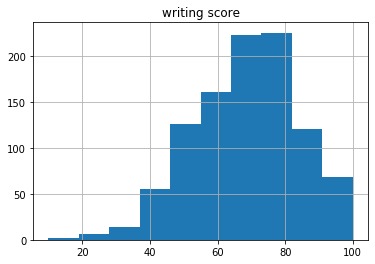

In [59]:
df.hist('writing score')

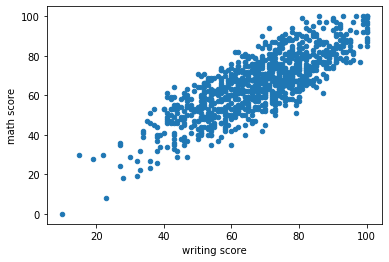

In [61]:
df.plot.scatter(x='writing score', y='math score')

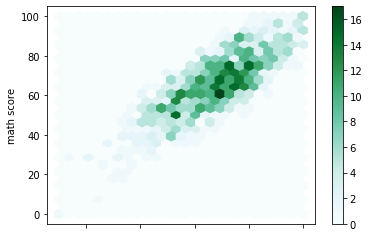

In [64]:
df.plot.hexbin(x='writing score', y='math score', gridsize=25)

### Excel

In [71]:
df.to_excel("foo.xlsx", sheet_name="Sheet1", index=False)

In [73]:
df2 = pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])
df2.head()

,math score,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,average score,pass/fail
0,72,female,group B,bachelor's degree,standard,none,72,74,72,0
1,69,female,group C,some college,standard,completed,90,88,82,1
2,90,female,group B,master's degree,standard,none,95,93,92,1
3,47,male,group A,associate's degree,free/reduced,none,57,44,49,0
4,76,male,group C,some college,standard,none,78,75,76,1
